# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=3x+1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [4]:


  (training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

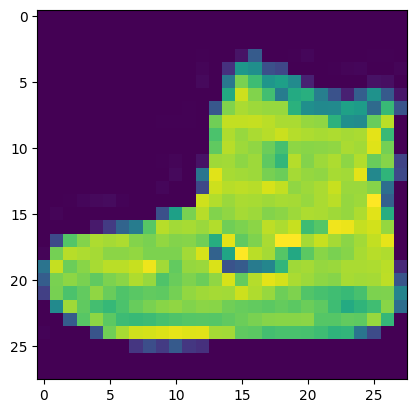

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.6548 - accuracy: 0.6927
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7110 - accuracy: 0.7390
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5800 - accuracy: 0.7985
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5218 - accuracy: 0.8214
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4988 - accuracy: 0.8283


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4870 - accuracy: 0.8297


[0.48701241612434387, 0.8296999931335449]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this.

To explore further, try the below exercises:


# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 3ms/step
[4.5947642e-13 1.2046093e-24 8.4575857e-19 6.0241657e-15 8.8594330e-23
 1.9944206e-01 6.5026492e-16 3.7208751e-02 3.2857048e-12 7.6334912e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does?

In [10]:
print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



####Answer:
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list




####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?



In [11]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4662
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3576
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3226
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2951
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[4.0125459e-09 2.6433684e-09 2.1531986e-10 1.2111015e-10 1.4306845e-09
 6.6792080e-04 4.5730868e-08 2.9011533e-02 2.2027254e-07 9.7032028e-01]
9


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3:

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5165
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3892
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3510
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3295
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[2.2364253e-05 1.8970864e-07 3.6238348e-06 8.6252221e-06 4.1495791e-06
 4.2313643e-02 2.1877249e-05 8.4378190e-02 7.0543960e-05 8.7317687e-01]
9


##Exercise 4:

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [13]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5249
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3977
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3641
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[2.7295555e-05 3.7055946e-07 1.0045837e-04 6.5808170e-05 8.8843699e-05
 3.3690900e-02 1.8636731e-04 6.7029558e-02 2.3317964e-04 8.9857715e-01]
9


##Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4675
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3565
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3195
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2961
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[5.7116467e-06 1.9392068e-05 2.8256679e-07 8.8505857e-07 6.7521660e-07
 7.2854452e-02 4.8055576e-06 1.4570034e-02 2.3027136e-05 9.1252065e-01]
9


#Exercise 6:

Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [15]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.12.0
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4991
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3747
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3364
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3109
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2909
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2790
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2561
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2450
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2383
Epoch 11/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2283
Epoch 12/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0

#Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [16]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4741
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3583
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3198
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2985
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[5.5136306e-06 6.0130219e-08 4.0314674e-07 4.7941452e-08 9.1732062e-08
 5.4361071e-03 2.5752609e-06 7.7496439e-02 7.6476528e-07 9.1705799e-01]
9


#Exercise 8:

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [17]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.12.0
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4737 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3588 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3216 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3009 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2780 - accuracy: 0.8976


In [18]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 3ms/step
[8.5959186e-07 1.8938255e-07 1.5150850e-07 3.0174483e-09 9.4922746e-07
 7.2805313e-03 1.5759899e-06 3.6614336e-02 3.6307691e-05 9.5606506e-01]


In [19]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 4.7881
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5858
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5296
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5145
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[2.8912982e-18 1.1142066e-13 3.2189059e-22 1.7677026e-13 2.2936417e-28
 5.4138947e-01 3.7093219e-22 2.8965738e-02 1.5495487e-12 4.2964476e-01]
9


In [20]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4736 - accuracy: 0.8321
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3587 - accuracy: 0.8683
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3231 - accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2969 - accuracy: 0.8904
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2795 - accuracy: 0.8963


In [21]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

<ipython-input-21-f469e2b82770>:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


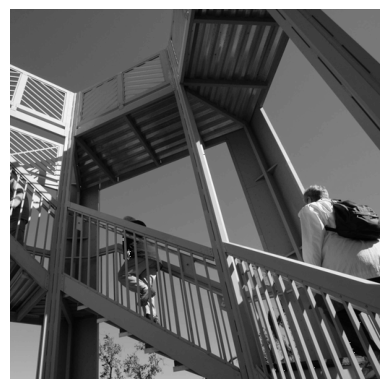

In [22]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [23]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [24]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines.
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [25]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

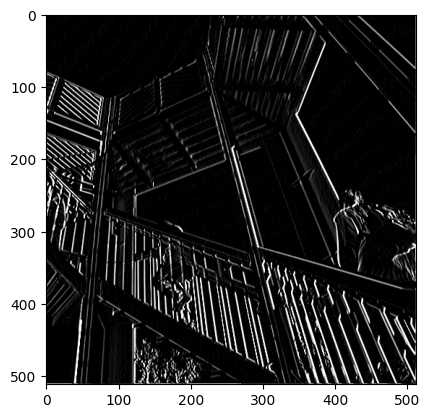

In [26]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

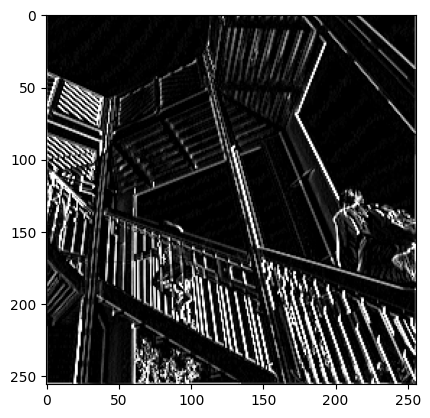

In [27]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [28]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4941 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3697 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3312 - accuracy: 0.8807
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3082 - accuracy: 0.8876
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8654
Test loss: 0.36644691228866577, Test accuracy: 86.54000163078308


In [29]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.12.0
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_23 (Dense)            (None, 128)      

In [30]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [31]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4448 - accuracy: 0.8386
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2982 - accuracy: 0.8909
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2539 - accuracy: 0.9063
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2236 - accuracy: 0.9186
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2511 - accuracy: 0.9082
Test loss: 0.2511049509048462, Test accuracy: 90.82000255584717


In [33]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 26ms/step


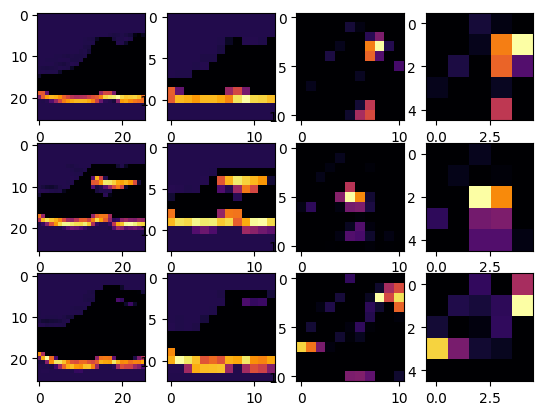

In [34]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [35]:
!wget \
  https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2023-09-07 14:15:17--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   103MB/s    in 1.4s    

2023-09-07 14:15:19 (103 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [38]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [39]:


# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [40]:


train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse43-7.png', 'horse30-5.png', 'horse40-1.png', 'horse40-2.png', 'horse41-0.png', 'horse12-3.png', 'horse42-3.png', 'horse28-6.png', 'horse03-4.png', 'horse06-5.png']
['human05-26.png', 'human08-22.png', 'human14-21.png', 'human11-20.png', 'human13-19.png', 'human15-04.png', 'human13-22.png', 'human16-03.png', 'human03-24.png', 'human12-24.png']


In [41]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

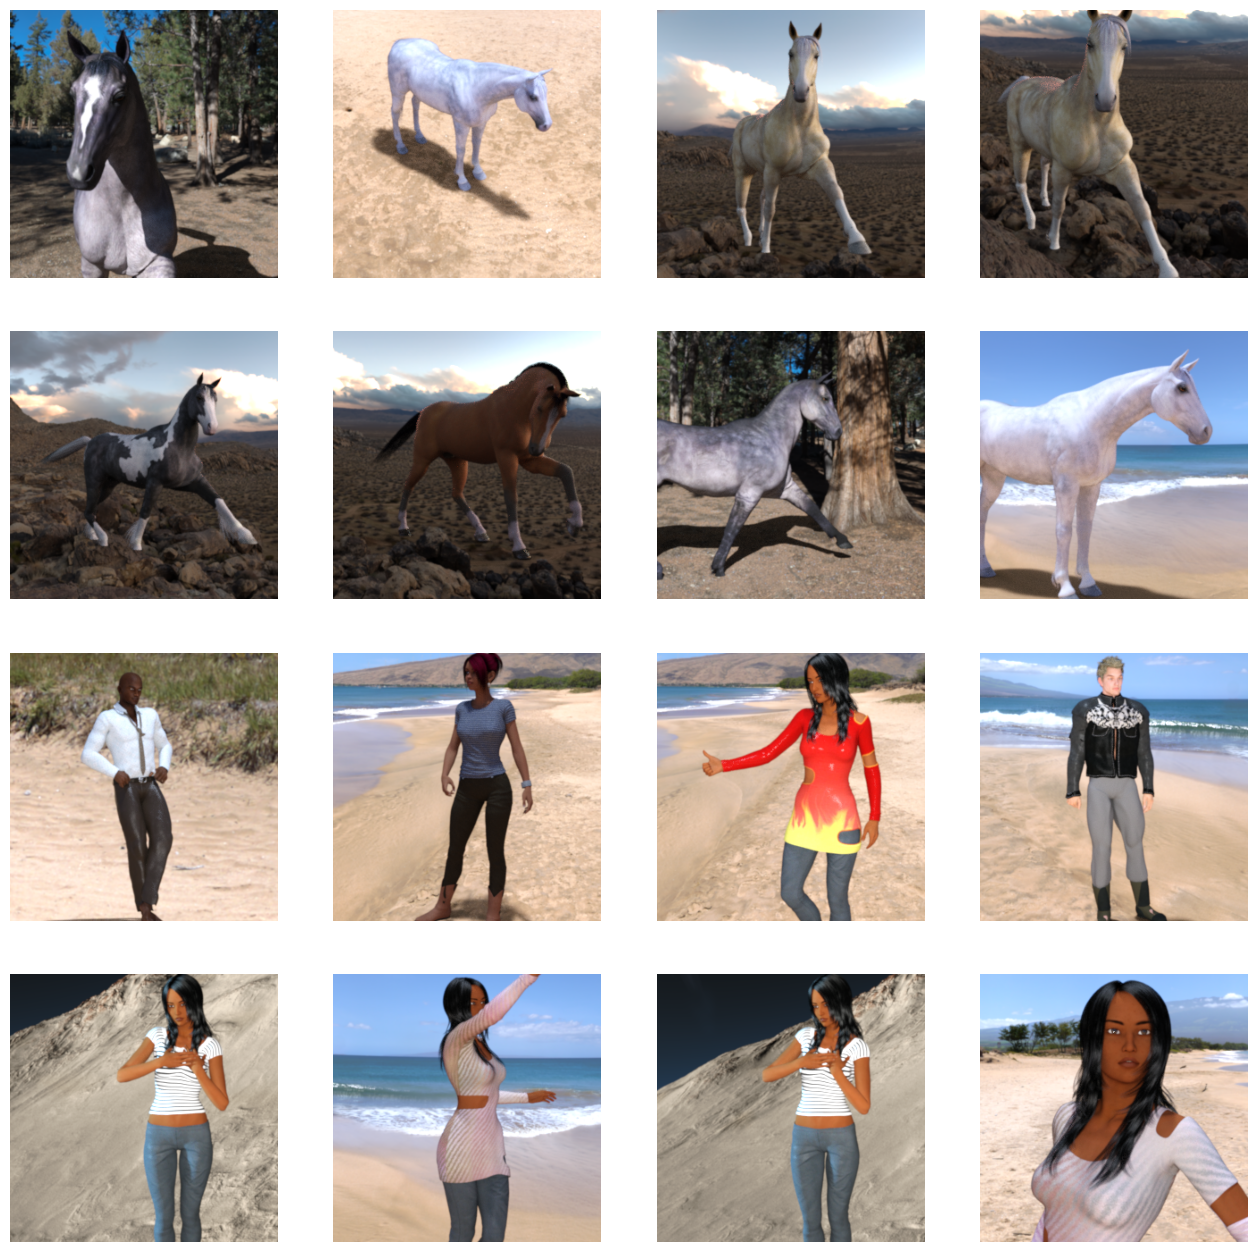

In [43]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [44]:
import tensorflow as tf

In [45]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)     

In [47]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [50]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=5,
      verbose=1)

Epoch 1/5
8/8 [==============================] - 100s 12s/step - loss: 0.6370 - acc: 0.6908
Epoch 2/5
8/8 [==============================] - 96s 12s/step - loss: 0.5136 - acc: 0.8387
Epoch 3/5
8/8 [==============================] - 93s 11s/step - loss: 1.3709 - acc: 0.8276
Epoch 4/5
8/8 [==============================] - 93s 11s/step - loss: 0.3160 - acc: 0.9199
Epoch 5/5
8/8 [==============================] - 93s 11s/step - loss: 0.2771 - acc: 0.8788


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset
# Note: This is a very large dataset and will take time to download
!wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" -O "/tmp/cats-and-dogs.zip"
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))
# Expected Output:
# 12501
# 12501

In [ ]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)
# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))
# Expected output:
# 11250
# 11250
# 1250
# 1250

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

In [ ]:
# Note that this may take some time.
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")